# Cryptocompare API Exercise

Going through the API notebook using the [Cryptocompare.com](https://www.cryptocompare.com/) API as it is relevant to the question I want to answer in my EDA project.

In [1]:
import requests

In [2]:
# Make a request to get historical Bitcoin data
response = requests.get('https://min-api.cryptocompare.com/data/histoday')

print(response.status_code)

200


In [3]:
params = {'fsym': 'BTC', 'tsym': 'USD', 'limit': 100}

response = requests.get('https://min-api.cryptocompare.com/data/histoday', params=params)

print(response.content)

b'{"Response":"Success","Type":100,"Aggregated":false,"Data":[{"time":1512518400,"close":13749.57,"high":13843.2,"low":11661.76,"open":11667.13,"volumefrom":191576.66,"volumeto":2437037791.81},{"time":1512604800,"close":16850.31,"high":16879.26,"low":13401.61,"open":13750.09,"volumefrom":297108.66,"volumeto":4510225316.19},{"time":1512691200,"close":16047.61,"high":17294.85,"low":13906.1,"open":16867.98,"volumefrom":286762.02,"volumeto":4546014731.58},{"time":1512777600,"close":14843.42,"high":16313.18,"low":13151.47,"open":16048.18,"volumefrom":181979.81,"volumeto":2699876215.33},{"time":1512864000,"close":15059.6,"high":15783.2,"low":13031,"open":14839.98,"volumefrom":201620.09,"volumeto":2904037859.64},{"time":1512950400,"close":16732.47,"high":17399.18,"low":15024.56,"open":15060.45,"volumefrom":159724.56,"volumeto":2634267594.52},{"time":1513036800,"close":17083.9,"high":17560.65,"low":16254.53,"open":16733.29,"volumefrom":132846.57,"volumeto":2246138895.89},{"time":1513123200,"cl

In [4]:
import json

In [5]:
data = response.json()['Data']
print(data[0])

{'time': 1512518400, 'close': 13749.57, 'high': 13843.2, 'low': 11661.76, 'open': 11667.13, 'volumefrom': 191576.66, 'volumeto': 2437037791.81}


In [6]:
import pandas as pd
import datetime

In [9]:
df = pd.DataFrame(data)
df['date'] = [datetime.date.fromtimestamp(d) for d in df.time]

In [10]:
df.head()

,close,high,low,open,time,volumefrom,volumeto,date
0,13749.57,13843.20,11661.76,11667.13,1512518400,191576.66,2.437038e+09,2017-12-05
1,16850.31,16879.26,13401.61,13750.09,1512604800,297108.66,4.510225e+09,2017-12-06
2,16047.61,17294.85,13906.10,16867.98,1512691200,286762.02,4.546015e+09,2017-12-07
3,14843.42,16313.18,13151.47,16048.18,1512777600,181979.81,2.699876e+09,2017-12-08
4,15059.60,15783.20,13031.00,14839.98,1512864000,201620.09,2.904038e+09,2017-12-09


In [11]:
df = df[['open', 'high', 'low', 'close', 'volumeto', 'date']]
df.head()

,open,high,low,close,volumeto,date
0,11667.13,13843.20,11661.76,13749.57,2.437038e+09,2017-12-05
1,13750.09,16879.26,13401.61,16850.31,4.510225e+09,2017-12-06
2,16867.98,17294.85,13906.10,16047.61,4.546015e+09,2017-12-07
3,16048.18,16313.18,13151.47,14843.42,2.699876e+09,2017-12-08
4,14839.98,15783.20,13031.00,15059.60,2.904038e+09,2017-12-09


In [27]:
# Create list of coins that we want databases for
coin_list = ['BTC', 'ETH', 'XRP', 'BCH', 'LTC', 'ADA', 'NEO', 'XLM', 'EOS', 'XMR']

# Create a function to generate desired dataframe for given coin name
def generate_historical_dataframe(sym, curr='USD', limit=100):
    url = 'https://min-api.cryptocompare.com/data/histoday'
    params = {'fsym': sym, 'tsym': curr, 'limit': limit}
    
    response = requests.get(url, params=params)
    data = response.json()['Data']
    df = pd.DataFrame(data)
    df['date'] = [datetime.date.fromtimestamp(d) for d in df.time]
    df = df[['open', 'high', 'low', 'close', 'volumeto', 'date']]
    
    return df

In [97]:
import requests
import pandas as pd
import numpy as np
import json
import datetime

def create_df_crypto(symbol, curr='USD', limit=2500):
    ''' This function takes in a symbol and returns a formatted dataframe to be used
        for later processing.  
        
        Args: symbol - cryptocurrency symbol to be used with Cryptocompare API
              curr - currency to report in (default USD)
              limit - max number of data points (default 2500)
        
        Return: df - dataframe of daily price info for symbol
    '''
    # Set url and params for the call to Cryptocompare API
    url = 'https://min-api.cryptocompare.com/data/histoday'
    params = {'fsym': symbol, 'tsym': curr, 'limit': limit}
    
    # Call API for symbol and put data into pandas dataframe
    response = requests.get(url, params=params)
    data = response.json()['Data']
    df = pd.DataFrame(data)
    
    # Add date column and set to index
    df['Date'] =[datetime.date.fromtimestamp(d) for d in df.time]
    df = df[['open', 'high', 'low', 'close', 'volumeto', 'Date']]
    df.set_index('Date', inplace=True)
    
    # Rename volumeto column
    df.rename(columns={'volumeto': 'volume'}, inplace=True)
    
    return df

In [100]:
df_btc = create_df_crypto('ETH')
df_btc.tail()

,open,high,low,close,volume
Date,,,,,
2018-03-15,610.66,626.13,585.16,600.53,2.210829e+08
2018-03-16,600.53,609.94,543.28,549.79,2.088433e+08
2018-03-17,549.79,559.93,454.18,537.38,7.198129e+08
2018-03-18,537.38,559.07,515.84,555.55,4.185006e+08
2018-03-19,555.55,555.62,516.78,550.30,2.091162e+08


In [28]:
import sqlite3

# Write function to create a database for all coins in coinlist
def create_database(df, table_name, sqlite_file):
    conn = sqlite3.connect(sqlite_file)
    c = conn.cursor()

    df.to_sql(table_name, conn, if_exists='replace')
    
    conn.commit()
    conn.close()

In [31]:
create_database(df, "TEST1", 'test_db.sqlite')

In [32]:
# Name of the database file
sqlite_file = 'cryptocompare_db.sqlite'

# Loop through coin list, get historical data, create new database
for coin in coin_list:
    coin_df = generate_historical_dataframe(coin)
    create_database(coin_df, coin, sqlite_file)

# Create a Securities Master Database 

## Schema 

### 1. Data - id | name | url 

### 2. Symbol - data_id | symbol | name | sector | exchange

### 3. Daily_Price - data_id | symbol | date | open | high | low | close | volume

In [16]:
import sqlite3

# Initialize variables for file name, table, columns, data types 
sqlite_file = 'securities_master_db.sqlite'
table_name = 'Data'
id_col = 'id'
name_col = 'name'
url_col = 'url'
dtype_int = 'INTEGER'
dtype_text = 'TEXT'

# Connect to the database file
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

# Create a new table with 3 columns
c.execute('CREATE TABLE {tn} ({ic} {dti} PRIMARY KEY, {nc} {dtt}, {uc} {dtt})'\
         .format(tn=table_name, ic=id_col, dti=dtype_int, nc=name_col, dtt=dtype_text, uc=url_col))

# Commit changes and close
conn.commit()
conn.close()

In [1]:
import sqlite3
sqlite_file = 'securities_master_db.sqlite'

# Drop table script to test
table_name = 'Symbol'
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

c.execute('DROP TABLE {tn}'.format(tn=table_name))

conn.commit()
conn.close()

In [9]:
# Drop table script to test
table_name = 'Symbol'
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

c.execute('DROP TABLE {tn}'.format(tn=table_name))

conn.commit()
conn.close()

In [4]:
# Define connect and close functions so you dont have to keep repeating them
def connect(sqlite_file):
    conn = sqlite3.connect(sqlite_file)
    c = conn.cursor()
    return conn, c

def close(conn):
    conn.commit()
    conn.close()

In [18]:
# Add value for Cryptocompare to Data table
conn, c = connect(sqlite_file)

c.execute("INSERT INTO {tn} ({ic}, {nc}, {uc}) VALUES (1, 'Cryptocompare', 'https://min-api.cryptocompare.com')"\
          .format(tn=table_name, ic=id_col, nc=name_col, uc=url_col))

close(conn)

In [19]:
# Add value for Quandl to Data table
conn, c = connect(sqlite_file)

c.execute("INSERT INTO {tn} ({ic}, {nc}, {uc}) VALUES (2, 'Quandl', 'https://docs.quandl.com')"\
          .format(tn=table_name, ic=id_col, nc=name_col, uc=url_col))

close(conn)

In [24]:
sqlite_file = 'securities_master_db.sqlite'
table_name = 'Data'
id_col = 'id'
name_col = 'name'
url_col = 'url'
dtype_int = 'INTEGER'
dtype_text = 'TEXT'
# Add value for Quandl to Data table
conn, c = connect(sqlite_file)

c.execute("INSERT INTO {tn} ({ic}, {nc}, {uc}) VALUES (2, 'Quandl', 'https://docs.quandl.com')"\
          .format(tn=table_name, ic=id_col, nc=name_col, uc=url_col))

close(conn)

In [5]:
table_name = 'Data'
id_col = 'id'
name_col = 'name'
url_col = 'url'
dtype_int = 'INTEGER'
dtype_text = 'TEXT'

# Add value for Test to Data table
conn, c = connect(sqlite_file)

c.execute("INSERT INTO {tn} ({nc}, {uc}) VALUES ('Test', 'https://www.test.com/')"\
          .format(tn=table_name, nc=name_col, uc=url_col))

close(conn)

In [7]:
conn, c = connect(sqlite_file)

c.execute("DELETE FROM Data WHERE id = 4")

close(conn)

In [10]:
# Create table for symbol
# Initialize variables for file name, table, columns, data types 
sqlite_file = 'securities_master_db.sqlite'

table_name = 'Symbols'

data_table = 'Data'
data_id = 'id'

id_col = 'id'
data_id_col = 'data_id'
symbol_col = 'symbol'
name_col = 'name'
sector_col = 'sector'
exchange_col = 'exchange'
dtype_int = 'INTEGER'
dtype_text = 'TEXT'

# Connect to the database file
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

# Create a new table with 3 columns
c.execute('CREATE TABLE {tn} ({ic} {dti} PRIMARY KEY,\
                              {dc} {dti},\
                              {sc} {dtt},\
                              {nc} {dtt},\
                              {sec} {dtt},\
                              {ec} {dtt},\
                              FOREIGN KEY ({dc}) REFERENCES {dt} ({dic}))'\
         .format(tn=table_name, ic=id_col, dti=dtype_int, dc=data_id_col, sc=symbol_col,\
                 dtt=dtype_text, nc=name_col, sec=sector_col, ec=exchange_col,\
                 dt=data_table, dic=data_id))

# Commit changes and close
conn.commit()
conn.close()

In [12]:
# Create table for daily_price
# Initialize variables for file name, table, columns, data types 
sqlite_file = 'securities_master_db.sqlite'

table_name = 'Daily_Prices'
symbols_table = 'Symbols'

id_col = 'id'
data_id_col = 'data_id'
symbol_col = 'symbol'
date_col = 'date'
open_col = 'open'
high_col = 'high'
low_col = 'low'
close_col = 'close'
volume_col = 'volume'

dtype_int = 'INTEGER'
dtype_text = 'TEXT'
dtype_real = 'REAL'

# Connect to the database file
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

# Create a new table with 3 columns
c.execute('CREATE TABLE {tn} ({ic} {dti} PRIMARY KEY,\
                              {dc} {dti},\
                              {sc} {dtt},\
                              {dtc} {dtt},\
                              {oc} {dtr},\
                              {hc} {dtr},\
                              {lc} {dtr},\
                              {cc} {dtr},\
                              {vc} {dti},\
                              FOREIGN KEY ({sc}) REFERENCES {st} ({sc}))'\
         .format(tn=table_name, ic=id_col, dti=dtype_int, dc=data_id_col, sc=symbol_col,\
                 dtt=dtype_text, dtc=date_col, oc=open_col, dtr=dtype_real, hc=high_col,\
                 lc=low_col, cc=close_col, vc=volume_col, st=symbols_table))

# Commit changes and close
conn.commit()
conn.close()

In [30]:
import pandas as pd

In [35]:
import quandl

data = quandl.get("SCF/CME_CL1_FW", authtoken="Hv95pPh1xQWzt5DFhxS7")

data.tail()

,Open,High,Low,Settle,Volume,Prev. Day Open Interest
Date,,,,,,
2014-12-24,56.80,57.15,55.07,55.84,174969.0,305486.0
2014-12-26,55.86,56.59,54.51,54.73,138280.0,304247.0
2014-12-29,55.05,55.74,52.90,53.61,253089.0,305205.0
2014-12-30,53.72,54.32,52.70,54.12,230228.0,310358.0
2014-12-31,53.87,54.02,52.44,53.27,247510.0,309473.0


In [101]:
def create_df_quandl(symbol, api_key):
    ''' This function takes in a symbol of a futures contract to be used
        with the Quandl API as well as the API key, and returns a formatted 
        dataframe for processing.
        
        Args: symbol - a symbol for a continuous futures contract
              api_key - Quandl API key
        
        Return: df - dataframe for daily price info for symbol
    '''
    # Quandl API call which puts price data into dataframe
    df = quandl.get('SCF/CME_{s}1_FW'.format(s=symbol), authtoken=api_key)
    
    # Drop open interest column and rename Settle column
    df.drop(['Prev. Day Open Interest'], axis=1, inplace=True)
    df.rename(columns={'Open': 'open',
                      'High': 'high',
                      'Low': 'low',
                      'Settle': 'close',
                      'Volume': 'volume'}, inplace=True)
    return df

In [103]:
api_key = 'Hv95pPh1xQWzt5DFhxS7'
df_CL = create_df_quandl('S', api_key)
df_CL.head()

,open,high,low,close,volume
Date,,,,,
2005-01-03,544.00,544.00,535.00,535.50,40094.0
2005-01-04,535.00,535.25,524.50,525.00,68201.0
2005-01-05,525.25,531.50,524.75,527.00,44148.0
2005-01-06,527.50,533.50,526.00,532.50,43688.0
2005-01-07,532.00,544.00,532.00,542.25,64591.0


In [38]:
data.index

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-22',
               '2014-12-23', '2014-12-24', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

In [39]:
import matplotlib.pyplot as plt

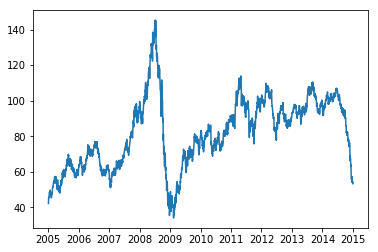

In [40]:
plt.plot(data.index, data.Settle)

plt.show()

In [15]:
general_code = 'SCF/CME_{}1_FW'.format('Insert ticker here')

sectors = {'grains': ['C', 'W', 'S'],
           'energies': ['CL', 'NG', 'HO'],
           'treasuries': ['US'],
           'forex': ['AD', 'CD', 'EC', 'BP', 'JY'],
           'indexes': ['ES'],
           'metals': ['GC', 'SI']}



tickers_names = {'CL': 'Crude', 'GC': 'Gold', 'AD': 'Aussie', 'CD': 'Canadien',
                 'EC': 'Euro', 'BP': 'Pound', 'JY': 'Yen', 'US': '30-yr', 'C': 'Corn',
                 'W': 'Wheat', 'S': 'Soybeans', 'ES': 'E-mini', 'NG': 'NatGas',
                 'HO': 'HeatOil', 'SI': 'Silver'}

In [22]:
import pandas as pd
import numpy as np
import quandl

# Get Quandl info into dict of dataframes
def generate_df_dict(futures, api_key):
    ''' This function takes in a list of futures symbols and returns a dict object
        with the symbols as keys and a dataframe of price info as values
        
        Args: futures - a list of string symbols for futures contracts
              api_key - unique Quandl api key
        
        Return: data - a dictionary of symbols mapped to dataframes of price info
    '''
    data = {}
    
    # Iterate through the list of symbols and retrieve raw data
    for f in futures:
        data[f] = quandl.get('SCF/CME_{}1_FW'.format(f), authtoken=api_key)
        
        # Drop open interest column and rename Settle column
        data[f].drop(['Prev. Day Open Interest'], axis=1, inplace=True)
        data[f].rename(columns={'Open': 'open',
                                'High': 'high',
                                'Low': 'low',
                                'Settle': 'close',
                                'Volume': 'volume'}, inplace=True)
    return data

In [17]:
# Example to check the function above
data1 = quandl.get('SCF/CME_{}1_FW'.format('ES'), authtoken='Hv95pPh1xQWzt5DFhxS7')
        
# Drop open interest column and rename Settle column
data1.drop(['Prev. Day Open Interest'], axis=1, inplace=True)
data1.rename(columns={'Open': 'open',
                      'High': 'high',
                      'Low': 'low',
                      'Settle': 'close',
                      'Volume': 'volume'}, inplace=True)
        
data1.head()

,open,high,low,close,volume
Date,,,,,
2005-01-03,1213.50,1221.25,1201.75,1206.25,672360.0
2005-01-04,1206.25,1209.50,1186.75,1191.00,869562.0
2005-01-05,1190.75,1195.00,1182.75,1183.25,855689.0
2005-01-06,1183.25,1193.75,1182.75,1188.25,678414.0
2005-01-07,1188.50,1194.50,1183.50,1186.25,766197.0


In [27]:
fut_list = [fut for l in sectors.values() for fut in l]
fut_list

['C',
 'W',
 'S',
 'CL',
 'NG',
 'HO',
 'US',
 'AD',
 'CD',
 'EC',
 'BP',
 'JY',
 'ES',
 'GC',
 'SI']

In [29]:
api_key = 'Hv95pPh1xQWzt5DFhxS7'

In [30]:
# Generate dict of dataframes for all futures 
df_dict = generate_df_dict(fut_list, api_key)

In [36]:
df_dict.keys()

dict_keys(['C', 'W', 'S', 'CL', 'NG', 'HO', 'US', 'AD', 'CD', 'EC', 'BP', 'JY', 'ES', 'GC', 'SI'])

In [20]:
import sqlite3

# Insert all symbols for Quandl data into Symbols table
def insert_symbols_table(sector_map, name_map, sqlite_file):
    ''' This function takes in two dicts, one mapping sectors to specific futres contracts,
        the other mapping symbols to full names.  It also takes in a sqlite file and then
        uses the info to insert all rows into the Symbols table of the database
        
        Args: sector_map - dict that maps breaks all futures into sectors
              name_map - dict that maps symbols to full names of the products
              sqlite_file - file for the database to write to
              
        Return: None - nothing explicit but inserts info into the database
    '''
    # Since this is specifc Quandl data all from CME exchange we can set these two params
    data_id = 2
    exchange = 'CME'
    
    # Create the column name list for database insertion
    table_name = 'Symbols'
    cols = ['data_id', 'symbol', 'name', 'sector', 'exchange']
    
    # Open a connection to the database
    conn = sqlite3.connect(sqlite_file)
    c = conn.cursor()
    
    # Iterate through all symbols to get sector and name
    for sector, s_list in sectors.items():
        for symbol in s_list:
            # Set params and insert row into database
            params = (data_id, symbol, name_map[symbol], sector, exchange)
            c.execute("INSERT INTO {tn} ({c0}, {c1}, {c2}, {c3}, {c4}) VALUES (?, ?, ?, ?, ?)"\
                      .format(tn=table_name, c0=cols[0], c1=cols[1], c2=cols[2],\
                             c3=cols[3], c4=cols[4]), params)
            
    # Close connection to database
    conn.commit()
    conn.close()

In [21]:
sqlite_file = 'securities_master_db.sqlite'

insert_symbols_table(sectors, tickers_names, sqlite_file)

In [89]:
import sqlite3

# Insert all price data into Daily_Prices database
def insert_daily_prices_table(df_dict, sqlite_file):
    ''' This function takes in a dict of dataframes, with each key being a different futures
        contract, and the value is the price data.  It also takes in a sqlite file and then
        uses the info to insert all rows into the Daily_Prices table of the database
        
        Args: df_dict - dict of dataframes with futures symbols and price data
              sqlite_file - file for the database to write to
              
        Return: None - nothing explicit but inserts info into the database
    '''
    # Since this is specifc Quandl data we can set data_id param
    data_id = 2
    
    # Create the column name list for database insertion
    table_name = 'Daily_Prices'
    cols = ['data_id', 'symbol', 'date', 'open', 'high', 'low', 'close', 'volume']
    
    # Open a connection to the database
    conn = sqlite3.connect(sqlite_file)
    c = conn.cursor()
    
    # Iterate through all symbols and then the dataframe to get all price data
    for symbol, df in df_dict.items():
        for i, row in df.iterrows():
            date = i.strftime('%Y-%m-%d')
            # Set params and insert row into database
            params = (data_id, symbol, date, row.open, row.high, row.low, row.close, row.volume)
            c.execute("INSERT INTO {tn} ({c0}, {c1}, {c2}, {c3}, {c4}, {c5}, {c6}, {c7}) VALUES (?, ?, ?, ?, ?, ?, ?, ?)".format(tn=table_name, c0=cols[0], c1=cols[1], c2=cols[2], c3=cols[3], c4=cols[4], c5=cols[5], c6=cols[6], c7=cols[7]), params)
            
    # Close connection to database
    conn.commit()
    conn.close()

In [41]:
import sqlite3

sqlite_file = 'securities_master_db.sqlite'

conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

table_name = 'Daily_Prices'
cols = ['data_id', 'symbol', 'date', 'open', 'high', 'low', 'close', 'volume']
params = (2, 'TEST', '2014-08-03', 50.00, 51.00, 50.00, 50.50, 1000000)
c.execute("INSERT INTO {tn} ({c0}, {c1}, {c2}, {c3}, {c4}, {c5}, {c6}, {c7}) VALUES (?, ?, ?, ?, ?, ?, ?, ?)".format(tn=table_name, c0=cols[0], c1=cols[1], c2=cols[2], c3=cols[3], c4=cols[4], c5=cols[5], c6=cols[6], c7=cols[7]), params)

conn.commit()
conn.close()

In [42]:
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

c.execute("DELETE FROM Daily_Prices WHERE id = 1")

conn.commit()
conn.close()

In [90]:
insert_daily_prices_table(df_dict, sqlite_file)

In [45]:
df_dict['AD'].index

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-22',
               '2014-12-23', '2014-12-24', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=2534, freq=None)

In [88]:
for i, row in df_dict['AD'].iterrows():
    print(i.strftime('%Y-%m-%d'))

2005-01-03
2005-01-04
2005-01-05
2005-01-06
2005-01-07
2005-01-10
2005-01-11
2005-01-12
2005-01-13
2005-01-14
2005-01-17
2005-01-18
2005-01-19
2005-01-20
2005-01-21
2005-01-24
2005-01-25
2005-01-26
2005-01-27
2005-01-28
2005-01-31
2005-02-01
2005-02-02
2005-02-03
2005-02-04
2005-02-07
2005-02-08
2005-02-09
2005-02-10
2005-02-11
2005-02-14
2005-02-15
2005-02-16
2005-02-17
2005-02-18
2005-02-22
2005-02-23
2005-02-24
2005-02-25
2005-02-28
2005-03-01
2005-03-02
2005-03-03
2005-03-04
2005-03-07
2005-03-08
2005-03-09
2005-03-10
2005-03-11
2005-03-14
2005-03-15
2005-03-16
2005-03-17
2005-03-18
2005-03-21
2005-03-22
2005-03-23
2005-03-24
2005-03-28
2005-03-29
2005-03-30
2005-03-31
2005-04-01
2005-04-04
2005-04-05
2005-04-06
2005-04-07
2005-04-08
2005-04-11
2005-04-12
2005-04-13
2005-04-14
2005-04-15
2005-04-18
2005-04-19
2005-04-20
2005-04-21
2005-04-22
2005-04-25
2005-04-26
2005-04-27
2005-04-28
2005-04-29
2005-05-02
2005-05-03
2005-05-04
2005-05-05
2005-05-06
2005-05-09
2005-05-10
2005-05-11

2011-03-11
2011-03-14
2011-03-15
2011-03-16
2011-03-17
2011-03-18
2011-03-21
2011-03-22
2011-03-23
2011-03-24
2011-03-25
2011-03-28
2011-03-29
2011-03-30
2011-03-31
2011-04-01
2011-04-04
2011-04-05
2011-04-06
2011-04-07
2011-04-08
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-18
2011-04-19
2011-04-20
2011-04-21
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-05-02
2011-05-03
2011-05-04
2011-05-05
2011-05-06
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-05
2011-07-06
2011-07-07
2011-07-08
2011-07-11
2011-07-12
2011-07-13
2011-07-14
2011-07-15
2011-07-18
2011-07-19
2011-07-20

In [67]:
test_df = df_dict['AD'].copy()

In [68]:
test_df.head()

,open,high,low,close,volume
Date,,,,,
2005-01-03,0.7788,0.7796,0.7682,0.7752,14068.0
2005-01-04,0.7722,0.7756,0.7590,0.7604,15847.0
2005-01-05,0.7609,0.7641,0.7554,0.7610,12380.0
2005-01-06,0.7609,0.7614,0.7538,0.7562,10174.0
2005-01-07,0.7578,0.7637,0.7502,0.7519,15410.0


In [86]:
for i, row in test_df.iterrows():
    print(i)

2005-01-03
2005-01-04
2005-01-05
2005-01-06
2005-01-07
2005-01-10
2005-01-11
2005-01-12
2005-01-13
2005-01-14
2005-01-17
2005-01-18
2005-01-19
2005-01-20
2005-01-21
2005-01-24
2005-01-25
2005-01-26
2005-01-27
2005-01-28
2005-01-31
2005-02-01
2005-02-02
2005-02-03
2005-02-04
2005-02-07
2005-02-08
2005-02-09
2005-02-10
2005-02-11
2005-02-14
2005-02-15
2005-02-16
2005-02-17
2005-02-18
2005-02-22
2005-02-23
2005-02-24
2005-02-25
2005-02-28
2005-03-01
2005-03-02
2005-03-03
2005-03-04
2005-03-07
2005-03-08
2005-03-09
2005-03-10
2005-03-11
2005-03-14
2005-03-15
2005-03-16
2005-03-17
2005-03-18
2005-03-21
2005-03-22
2005-03-23
2005-03-24
2005-03-28
2005-03-29
2005-03-30
2005-03-31
2005-04-01
2005-04-04
2005-04-05
2005-04-06
2005-04-07
2005-04-08
2005-04-11
2005-04-12
2005-04-13
2005-04-14
2005-04-15
2005-04-18
2005-04-19
2005-04-20
2005-04-21
2005-04-22
2005-04-25
2005-04-26
2005-04-27
2005-04-28
2005-04-29
2005-05-02
2005-05-03
2005-05-04
2005-05-05
2005-05-06
2005-05-09
2005-05-10
2005-05-11

2011-10-07
2011-10-10
2011-10-11
2011-10-12
2011-10-13
2011-10-14
2011-10-17
2011-10-18
2011-10-19
2011-10-20
2011-10-21
2011-10-24
2011-10-25
2011-10-26
2011-10-27
2011-10-28
2011-10-31
2011-11-01
2011-11-02
2011-11-03
2011-11-04
2011-11-07
2011-11-08
2011-11-09
2011-11-10
2011-11-11
2011-11-14
2011-11-15
2011-11-16
2011-11-17
2011-11-18
2011-11-21
2011-11-22
2011-11-23
2011-11-25
2011-11-28
2011-11-29
2011-11-30
2011-12-01
2011-12-02
2011-12-05
2011-12-06
2011-12-07
2011-12-08
2011-12-09
2011-12-12
2011-12-13
2011-12-14
2011-12-15
2011-12-16
2011-12-19
2011-12-20
2011-12-21
2011-12-22
2011-12-23
2011-12-27
2011-12-28
2011-12-29
2011-12-30
2012-01-03
2012-01-04
2012-01-05
2012-01-06
2012-01-09
2012-01-10
2012-01-11
2012-01-12
2012-01-13
2012-01-17
2012-01-18
2012-01-19
2012-01-20
2012-01-23
2012-01-24
2012-01-25
2012-01-26
2012-01-27
2012-01-30
2012-01-31
2012-02-01
2012-02-02
2012-02-03
2012-02-06
2012-02-07
2012-02-08
2012-02-09
2012-02-10
2012-02-13
2012-02-14
2012-02-15
2012-02-16

In [94]:
# Test Join functionality of database
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

c.execute("SELECT * FROM Daily_Prices INNER JOIN Data ON data_id = Data.id LIMIT 25")

c.fetchall()

[(1,
  2,
  'C',
  '2005-01-03',
  203.5,
  203.5,
  201.0,
  201.75,
  887,
  2,
  'Quandl',
  'https://docs.quandl.com'),
 (2,
  2,
  'C',
  '2005-01-04',
  201.25,
  201.75,
  200.25,
  201.0,
  45377,
  2,
  'Quandl',
  'https://docs.quandl.com'),
 (3,
  2,
  'C',
  '2005-01-05',
  201.0,
  202.75,
  200.5,
  201.5,
  23692,
  2,
  'Quandl',
  'https://docs.quandl.com'),
 (4,
  2,
  'C',
  '2005-01-06',
  201.5,
  209.5,
  201.5,
  208.75,
  62897,
  2,
  'Quandl',
  'https://docs.quandl.com'),
 (5,
  2,
  'C',
  '2005-01-07',
  207.5,
  209.75,
  205.75,
  206.75,
  96739,
  2,
  'Quandl',
  'https://docs.quandl.com'),
 (6,
  2,
  'C',
  '2005-01-10',
  206.5,
  207.0,
  204.5,
  206.75,
  38477,
  2,
  'Quandl',
  'https://docs.quandl.com'),
 (7,
  2,
  'C',
  '2005-01-11',
  206.75,
  207.75,
  206.0,
  206.75,
  31193,
  2,
  'Quandl',
  'https://docs.quandl.com'),
 (8,
  2,
  'C',
  '2005-01-12',
  206.25,
  206.5,
  200.0,
  200.5,
  97899,
  2,
  'Quandl',
  'https://docs.qu

In [104]:
# Dict of all products with maps to data_id, name, sector, and exchange
products = {'CL': [2, 'Crude', 'Energy', 'CME'],
            'HO': [2, 'HeatOil', 'Energy', 'CME'],
            'NG': [2, 'NatGas', 'Energy', 'CME'],
            'GC': [2, 'Gold', 'Metals', 'CME'],
            'SI': [2, 'Silver', 'Metals', 'CME'],
            'AD': [2, 'Aussie', 'Forex', 'CME'],
            'CD': [2, 'Canadien', 'Forex', 'CME'],
            'EC': [2, 'Euro', 'Forex', 'CME'],
            'BP': [2, 'Pound', 'Forex', 'CME'],
            'JY': [2, 'Yen', 'Forex', 'CME'],
            'US': [2, '30-yr', 'Treasuries', 'CME'],
            'C': [2, 'Corn', 'Grains', 'CME'],
            'W': [2, 'Wheat', 'Grains', 'CME'],
            'S': [2, 'Soybeans', 'Grains', 'CME'],
            'ES': [2, 'E-mini', 'Indexes', 'CME'],
            'BTC': [1, 'Bitcoin', 'Cryptocurrency', 'CCAgg'],
            'ETH': [1, 'Ethereum', 'Cryptocurrency', 'CCAgg'],
            'XRP': [1, 'Ripple', 'Cryptocurrency', 'CCAgg'],
            'BCH': [1, 'BitcoinCash', 'Cryptocurrency', 'CCAgg'],
            'LTC': [1, 'Litecoin', 'Cryptocurrency', 'CCAgg'],
            'ADA': [1, 'Cardano', 'Cryptocurrency', 'CCAgg'],
            'NEO': [1, 'Neo', 'Cryptocurrency', 'CCAgg'],
            'XLM': [1, 'Stellar', 'Cryptocurrency', 'CCAgg'],
            'EOS': [1, 'EOS', 'Cryptocurrency', 'CCAgg'],
            'XMR': [1, 'Monero', 'Cryptocurrency', 'CCAgg'],
            }

In [110]:
cc_products = [p for p in products.keys() if (products[p][0] == 1)]

# List of Quandl products
quandl_products = [p for p in products.keys() if (products[p][0] == 2)]

In [120]:
def generate_df_dict1(product_dict, api_key):
    ''' This function takes in a dict of product symbols mapped to
        information about the product  and a Quandl API key and returns
        a dict object with the symbols as keys and a dataframe of price
        info as values.

        Args: product_dict - a dict of symbols for products with maps to
                             a list of info
              api_key - Quandl API key

        Return: df_dict - a dictionary of symbols mapped to dataframes of price info
    '''
    df_dict = {}

    # Iterate through list
    for product, info in product_dict.items():
        # Determine what dataframe creator to use
        if info[0] == 1:
            df = create_df_crypto(product)
        if info[0] == 2:
            df = create_df_quandl(product, api_key)

        df_dict[product] = df

    return df_dict

In [123]:
df_dict1 = generate_df_dict1(products, api_key)

In [124]:
df_dict1.keys()

dict_keys(['CL', 'HO', 'NG', 'GC', 'SI', 'AD', 'CD', 'EC', 'BP', 'JY', 'US', 'C', 'W', 'S', 'ES', 'BTC', 'ETH', 'XRP', 'BCH', 'LTC', 'ADA', 'NEO', 'XLM', 'EOS', 'XMR'])